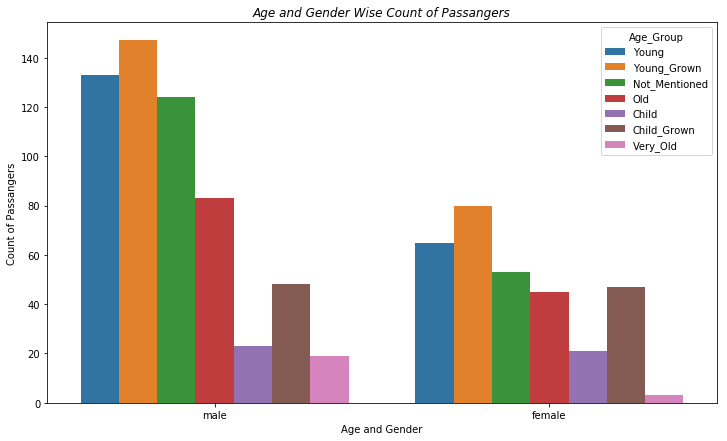

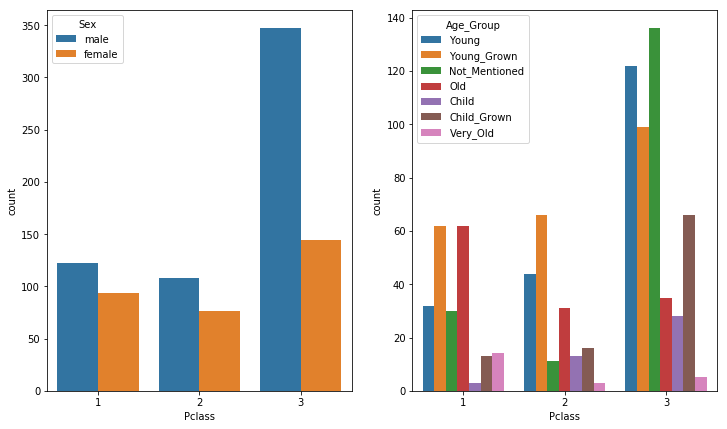

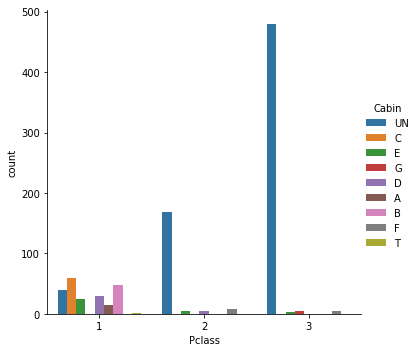

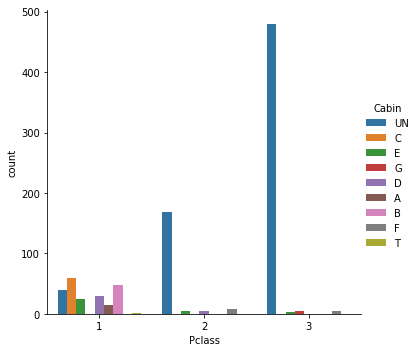

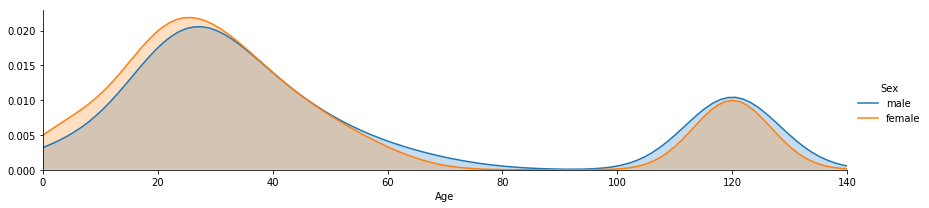

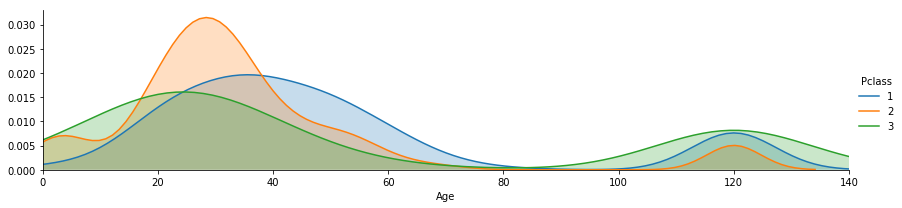

In [59]:
import re
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
import warnings
warnings.filterwarnings('ignore')
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

t_train=pd.read_csv('C://Users//735184//Downloads//train.csv')
t_test=pd.read_csv('C://Users//735184//Downloads//test.csv')
t_gender=pd.read_csv('C://Users//735184//Downloads//gender_submission.csv')

#If Siblings are 0 means No Family
t_train['Family']=np.where ((t_train.SibSp > 0) & (t_train.Parch > 0) ,'Yes','No')
#If Survived are 0 means False i.e NO and 1 is True i.e Yes
t_train['Survive']=t_train.Survived.map({0:'No',1:'Yes'})

t_train.Age=np.where(pd.isnull(t_train.Age),120,t_train.Age)

################ Gender and Age Wise Count Of Passangers ######################
#Binning Preocess to categoeries the Age in betwwen Lst1 ie 0 to 5 ,5 to 10 and so on 
lst=[i for i in t_train.Age]
lst1=[0,5,18,27,40,60,100,120]
bin_labels_age = ['Child', 'Child_Grown', 'Young', 'Young_Grown', 'Old','Very_Old','Not_Mentioned']
#New Column as Binning list as new column for categorise in our graph with labels=bin_labels_age's list by index comparision
t_train['Age_Group']=list(pd.cut(lst,lst1,labels=bin_labels_age))

################ Gender and Age Wise Count Of Passangers Graph ######################

fig, ax = plt.subplots(figsize=(12,7))
sns.catplot("Sex",data=t_train,kind="count",hue='Age_Group',ax=ax)
plt.close(2)
plt.title('Age and Gender Wise Count of Passangers',style='italic')
plt.xlabel('Age and Gender')
plt.ylabel('Count of Passangers')
##################################
t_train.Cabin=t_train.Cabin.fillna('UN')
t_train.Cabin=np.where(t_train.Cabin =='UN','UN',[i[0] for i in t_train.Cabin ])
t_train.Cabin
################ Gender and Age Wise Class Count Of Passangers ######################

f, axes = plt.subplots(1,2,figsize=(12,7))
sns.catplot("Pclass",data=t_train,kind="count",hue='Sex',ax=axes[0])
sns.catplot("Pclass",data=t_train,kind="count",hue='Age_Group',ax=axes[1])
plt.close(3)
plt.close(4)

################ Class and Cabin Wise Class Count Of Passangers ######################

v1=sns.catplot("Pclass",data=t_train,kind="count",hue='Cabin')
v2=sns.catplot("Pclass",data=t_train,kind="count",hue='Cabin')


################ KDE plot of Age with sex Of Passangers ######################

fig1=sns.FacetGrid(data=t_train,hue='Sex',aspect=4)
fig1.map(sns.kdeplot,'Age',shade='True')
oldest=t_train.Age.max()
fig1.set(xlim=(0,oldest+20))
fig1.add_legend()


################ KDE plot of Age with Class Of Passangers ######################

fig1=sns.FacetGrid(data=t_train,hue='Pclass',aspect=4)
fig1.map(sns.kdeplot,'Age',shade='True')
oldest=t_train.Age.max()
fig1.set(xlim=(0,oldest+20))
fig1.add_legend()

######################################################################
#####################################################################


plt.show()



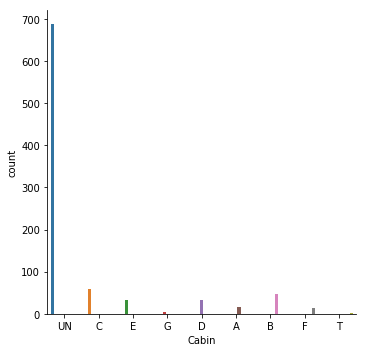

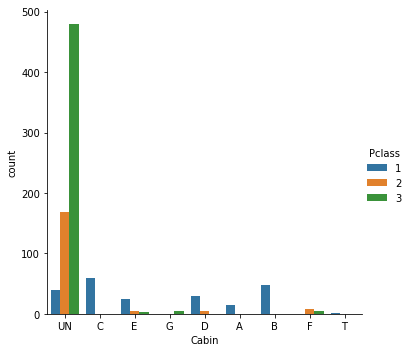

In [103]:
v1=sns.catplot("Cabin",data=t_train,kind="count",hue='Pclass')
v2=sns.catplot("Cabin",data=t_train,kind="count",hue='Pclass')

In [54]:
t_train.SibSp.unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

In [55]:
t_train.Parch.unique()

array([0, 1, 2, 5, 3, 4, 6], dtype=int64)

In [58]:
t_train.Survived.unique()

array([0, 1], dtype=int64)

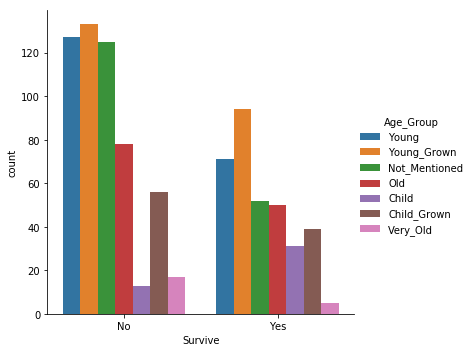

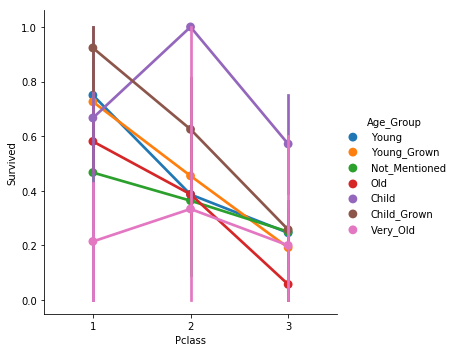

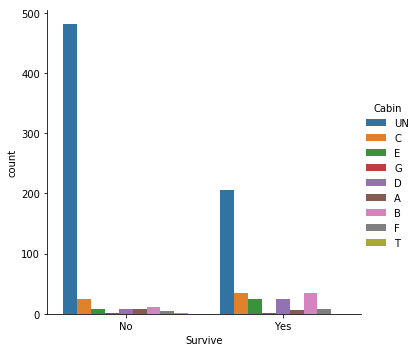

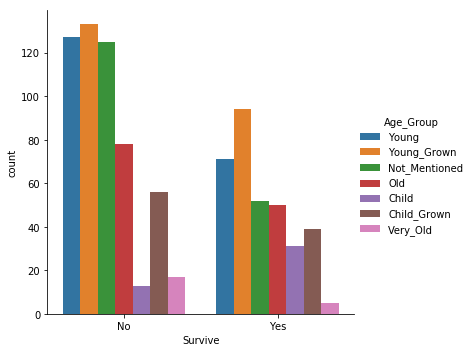

In [107]:
sns.catplot("Survive",data=t_train,kind="count",hue='Age_Group')
f=sns.factorplot("Pclass","Survived",data=t_train,hue='Age_Group')
sns.catplot("Survive",data=t_train,kind="count",hue='Cabin')
sns.factorplot("Survive",data=t_train,kind="count",hue='Age_Group')




In [60]:
t_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family,Survive,Age_Group
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,UN,S,No,No,Young
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C,No,Yes,Young_Grown
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,UN,S,No,Yes,Young
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S,No,Yes,Young_Grown
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,UN,S,No,No,Young_Grown
5,6,0,3,"Moran, Mr. James",male,120.0,0,0,330877,8.4583,UN,Q,No,No,Not_Mentioned
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E,S,No,No,Old
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,UN,S,Yes,No,Child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,UN,S,No,Yes,Young
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,UN,C,No,Yes,Child_Grown


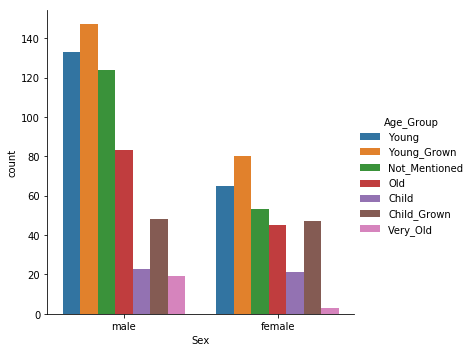

In [3]:
sns.catplot("Sex",data=t_train,kind="count",hue='Age_Group')

UN
38.0
UN
35.0
UN
UN
54.0
UN
UN
UN
4.0
58.0
UN
UN
UN
UN
UN
UN
UN
UN
UN
34.0
UN
28.0
UN
UN
UN
19.0
UN
UN
UN
120.0
UN
UN
UN
UN
UN
UN
UN
UN
UN
UN
UN
UN
UN
UN
UN
UN
UN
UN
UN
UN
49.0
UN
65.0
120.0
UN
UN
UN
UN
UN
38.0
45.0
UN
UN
UN
29.0
UN
UN
UN
UN
UN
UN
UN
UN
25.0
UN
UN
UN
UN
UN
UN
UN
UN
UN
UN
UN
UN
23.0
UN
UN
UN
46.0
UN
UN
UN
71.0
23.0
UN
UN
UN
UN
21.0
UN
UN
UN
UN
UN
UN
UN
47.0
UN
UN
UN
UN
UN
UN
UN
24.0
UN
UN
UN
UN
32.5
54.0
UN
UN
UN
120.0
UN
UN
UN
UN
UN
UN
UN
19.0
37.0
UN
24.0
UN
UN
UN
UN
UN
UN
UN
UN
36.5
UN
UN
22.0
UN
UN
UN
UN
UN
UN
UN
UN
UN
UN
UN
UN
UN
UN
120.0
UN
UN
UN
61.0
UN
UN
UN
56.0
UN
UN
50.0
UN
UN
UN
UN
UN
1.0
UN
120.0
UN
UN
UN
UN
UN
UN
UN
3.0
44.0
58.0
UN
UN
UN
UN
UN
UN
UN
UN
UN
2.0
UN
UN
UN
40.0
UN
UN
UN
UN
UN
31.0
UN
UN
32.0
UN
UN
UN
UN
UN
38.0
UN
UN
UN
UN
UN
35.0
UN
UN
UN
UN
UN
UN
UN
UN
UN
UN
UN
UN
UN
UN
44.0
UN
UN
37.0
UN
UN
29.0
62.0
UN
UN
UN
UN
30.0
UN
UN
UN
UN
52.0
40.0
UN
UN
UN
UN
58.0
35.0
UN
UN
UN
37.0
UN
63.0
UN
UN
UN
UN
UN
UN
UN
UN
120.0
UN
UN
UN
UN
UN
UN
19.0
36.0

In [288]:
t_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family,Age_Group
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Yes,Young
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Yes,Young_Grown
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,No,Young
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Yes,Young_Grown
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,No,Young_Grown
5,6,0,3,"Moran, Mr. James",male,999.0,0,0,330877,8.4583,NaN,Q,No,Not_Mentioned
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,No,Old
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,Yes,Child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,No,Young
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,Yes,Child_Grown


In [281]:
t_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family,Age_Group
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Yes,Young
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Yes,Young_Grown
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,No,Young
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Yes,Young_Grown
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,No,Young_Grown
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,No,NaN
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,No,Old
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,Yes,Child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,No,Young
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,Yes,Child_Grown


In [215]:
t_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family,Age_Group
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Yes,"(15, 25]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Yes,"(35, 55]"
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,No,"(25, 35]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Yes,"(25, 35]"
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,No,"(25, 35]"
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,No,NA
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,No,"(35, 55]"
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,Yes,NA
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,No,"(25, 35]"
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,Yes,"(10, 15]"


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family,Age_Group


In [164]:
t_train[pd.isnull(t_train.Age_Group)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family,Age_Group
